In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
#loading dataset
cust=pd.read_excel("customer_retention_dataset.xlsx")
cust

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [4]:
#columns
cust.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
cust['3 Which city do you shop online from?']

0              Delhi
1              Delhi
2      Greater Noida
3            Karnal 
4         Bangalore 
           ...      
264            Solan
265        Ghaziabad
266       Bangalore 
267            Solan
268        Ghaziabad
Name: 3 Which city do you shop online from?, Length: 269, dtype: object

In [6]:
cust['4 What is the Pin Code of where you shop online from?']

0      110009
1      110030
2      201308
3      132001
4      530068
        ...  
264    173212
265    201008
266    560010
267    173229
268    201009
Name: 4 What is the Pin Code of where you shop online from?, Length: 269, dtype: int64

In [7]:
#to check null values
cust.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

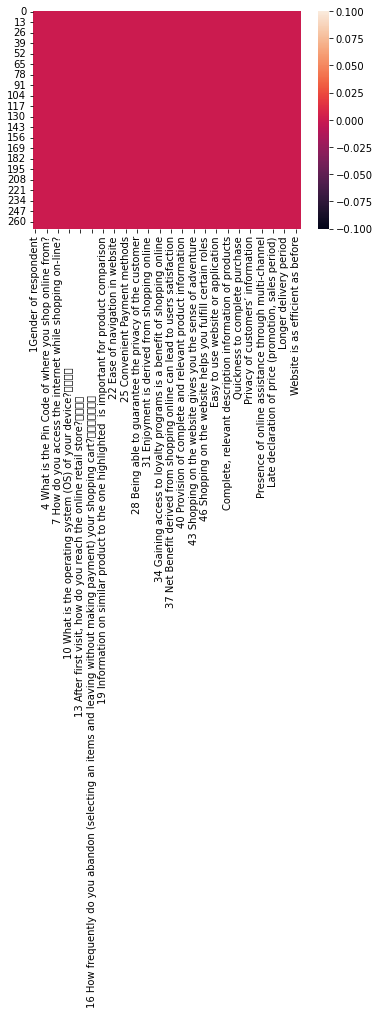

In [8]:
#Null values heatmap
sns.heatmap(cust.isnull())

Null valiues not present

In [9]:
cust.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [10]:
cust.keys()

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [11]:
cust.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [12]:
#to display all columns
pd.set_option("display.max_columns",None)

In [13]:
#to display all rows
pd.set_option('display.max_rows',None)

In [14]:
cust

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
5                  Female         31-40 years   
6                    Male         41-50 yaers   
7                    Male         41-50 yaers   
8                  Female  Less than 20 years   
9                  Female         31-40 years   
10                   Male         31-40 years   
11                 Female         41-50 yaers   
12                 Female  51 years and above   
13                 Female         31-40 years   
14                 Female         21-30 years   
15                 Female         21-30 years   
16                   Male         31-40 years   
17                   Male         41-50 yaers   
18                 Female         41-50 yaers   
19                 Female         21-30 years   
20                 Female         21-30 years   
21                   Male         31-40 years   
22                   Male         41-50 yaers   
23                 Female         41-50 yaers   
24                 Female         21-30 years   
25                 Female         21-30 years   
26                   Male         21-30 years   
27                   Male         31-40 years   
28                 Female         41-50 yaers   
29                 Female         41-50 yaers   
30                 Female  Less than 20 years   
31                   Male         31-40 years   
32                   Male         31-40 years   
33                 Female         41-50 yaers   
34                 Female  51 years and above   
35                 Female         21-30 years   
36                   Male         31-40 years   
37                   Male         41-50 yaers   
38                 Female         41-50 yaers   
39                 Female         21-30 years   
40                 Female         21-30 years   
41                   Male         31-40 years   
42                   Male         21-30 years   
43                 Female         21-30 years   
44                 Female         31-40 years   
45                 Female         41-50 yaers   
46                   Male         41-50 yaers   
47                   Male  Less than 20 years   
48                 Female         31-40 years   
49                 Female         31-40 years   
50                 Female         41-50 yaers   
51                   Male  51 years and above   
52                   Male         41-50 yaers   
53                 Female         41-50 yaers   
54                 Female         21-30 years   
55                 Female         21-30 years   
56                   Male         21-30 years   
57                   Male         21-30 years   
58                 Female         31-40 years   
59                 Female         41-50 yaers   
60                 Female         41-50 yaers   
61                   Male  Less than 20 years   
62                   Male         31-40 years   
63                 Female         31-40 years   
64                 Female         41-50 yaers   
65                 Female  51 years and above   
66                   Male         31-40 years   
67                   Male         41-50 yaers   
68                 Female         41-50 yaers   
69                 Female         21-30 years   
70                 Female         21-30 years   
71                   Male         31-40 years   
72                   Male         21-30 years   
73                 Female         21-30 years   
74                 Female         31-40 years   
75                 Female         41-50 yaers   
76                   Male         41-50 yaers   
77                   Male  Less than 20 years   
78                 Female         31-40 years   
79                 Female         31-40 years   
80                 Female         4

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

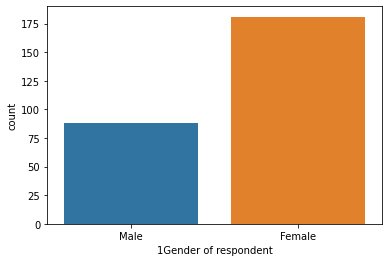

In [15]:
#most of the customers are females
sns.countplot(cust["1Gender of respondent"])

<AxesSubplot:xlabel='2 How old are you? ', ylabel='count'>

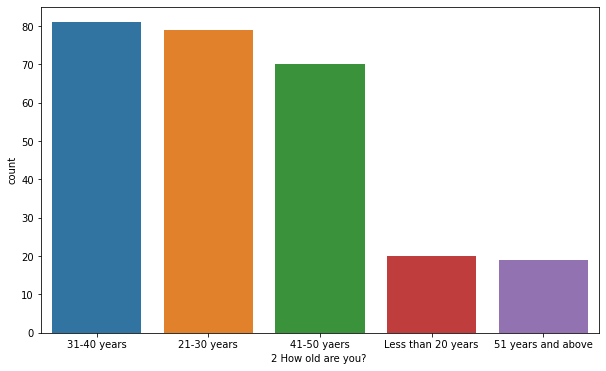

In [16]:
#most of the customers are from the age group 31-40yrs and least are from 51 and above years
plt.figure(figsize=(10,6))
sns.countplot(cust["2 How old are you? "])

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

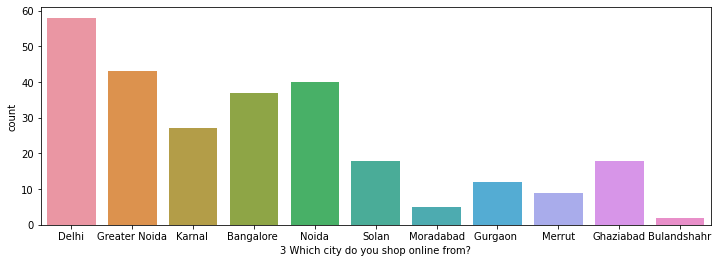

In [17]:
#most of the customer are from delhi and then greater noida, noida and so on least from bulandsahr 
plt.figure(figsize=(12,4))
sns.countplot(cust["3 Which city do you shop online from?"])

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='count'>

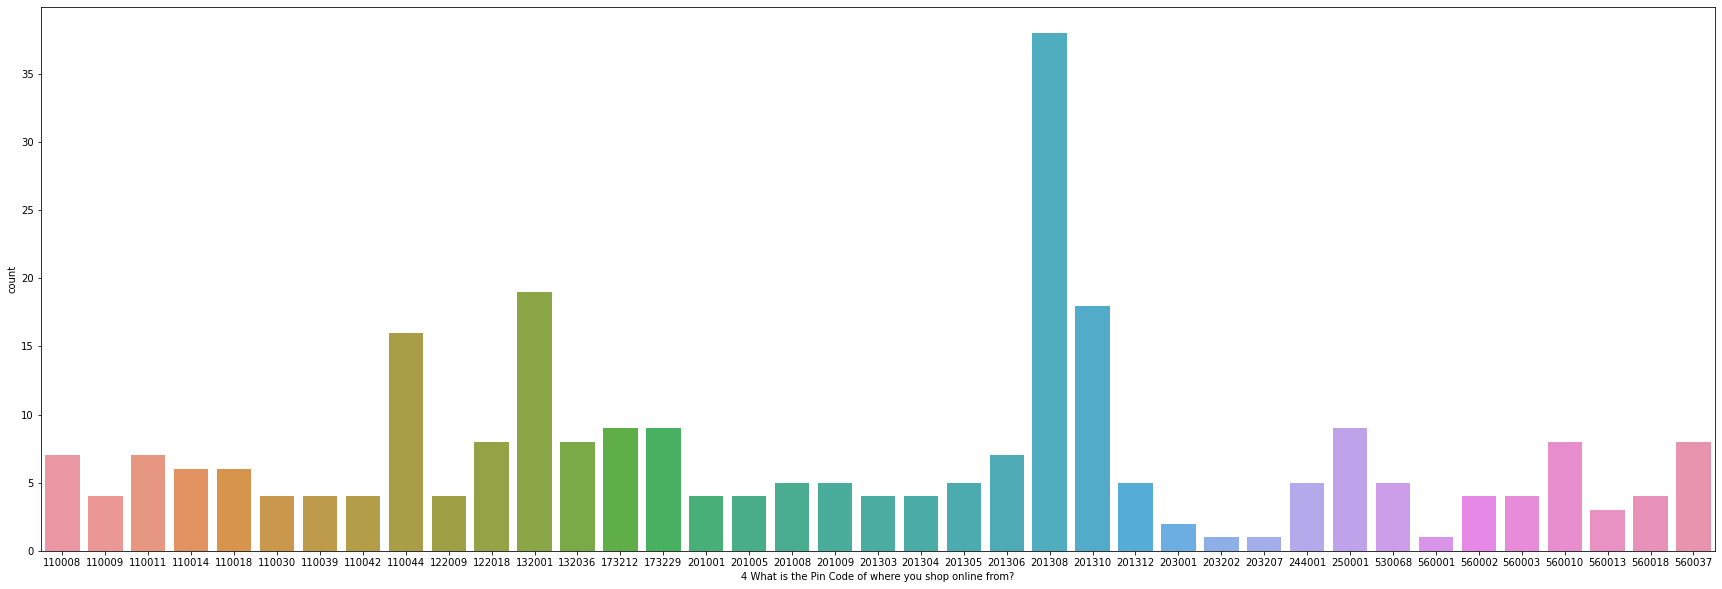

In [18]:
#most customers are from pin code 201308 and least are from 56001
plt.figure(figsize=(30,10))
sns.countplot(cust["4 What is the Pin Code of where you shop online from?"])

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

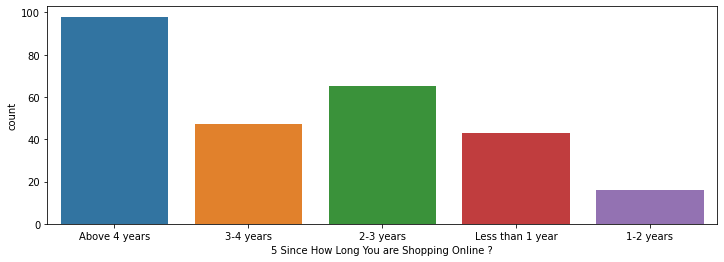

In [19]:
#most of the customers are shopping online more than 4 years some are new customers in 1-2 years
plt.figure(figsize=(12,4))
sns.countplot(cust["5 Since How Long You are Shopping Online ?"])

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='count'>

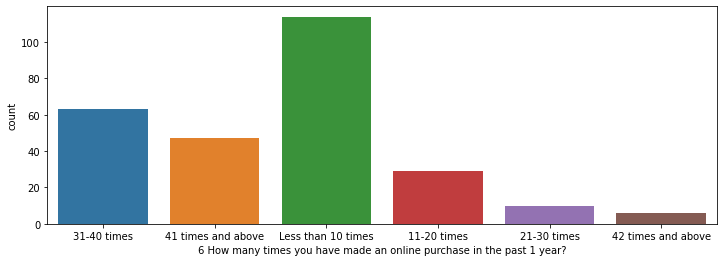

In [20]:
#most of student shop online less than 10 times in years , a very few customers shop online more than 42 times in a year
plt.figure(figsize=(12,4))
sns.countplot(cust["6 How many times you have made an online purchase in the past 1 year?"])

<AxesSubplot:xlabel='7 How do you access the internet while shopping on-line?', ylabel='count'>

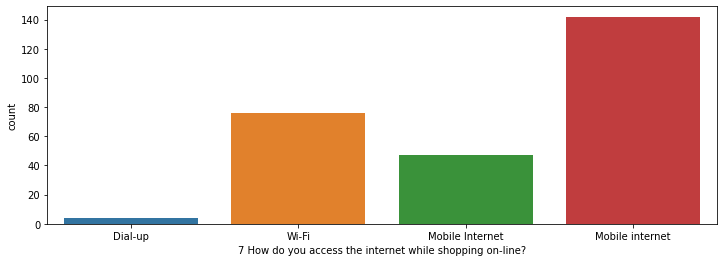

In [21]:
#more than half of customeres use mobile internet to shop online
plt.figure(figsize=(12,4))
sns.countplot(cust["7 How do you access the internet while shopping on-line?"])

<AxesSubplot:xlabel='8 Which device do you use to access the online shopping?', ylabel='count'>

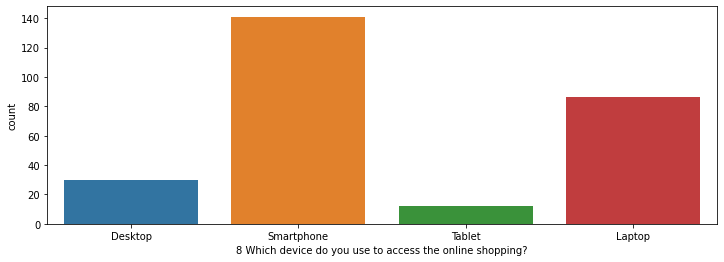

In [22]:
#most of customer use smartphones and laptop to shop online
plt.figure(figsize=(12,4))
sns.countplot(cust["8 Which device do you use to access the online shopping?"])

<AxesSubplot:xlabel='9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ', ylabel='count'>

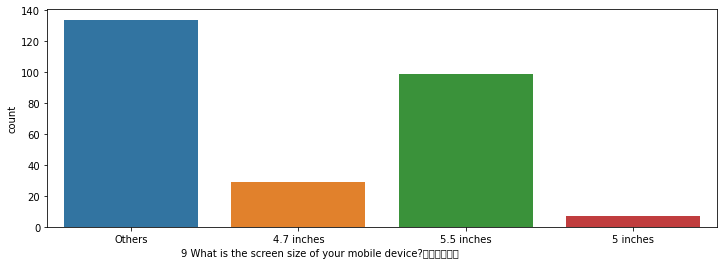

In [23]:
#most of customers use 5.5 inches screen to shop onlime 
plt.figure(figsize=(12,4))
sns.countplot(cust["9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        "])

<AxesSubplot:xlabel='10 What is the operating system (OS) of your device?\t\t\t\t                                          ', ylabel='count'>

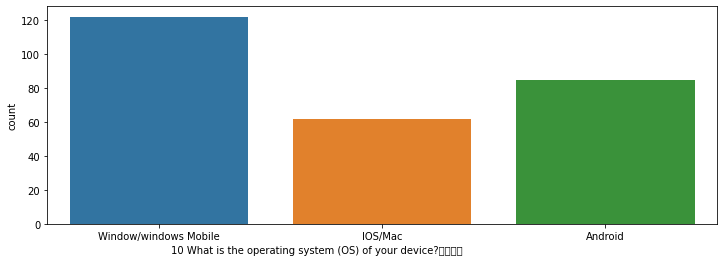

In [24]:
#most of customers use windows/windows mobile than androids and a few people use ios/mac to shop online
plt.figure(figsize=(12,4))
sns.countplot(cust["10 What is the operating system (OS) of your device?\t\t\t\t                                          "])

<AxesSubplot:xlabel='11 What browser do you run on your device to access the website?\t\t\t                                                          ', ylabel='count'>

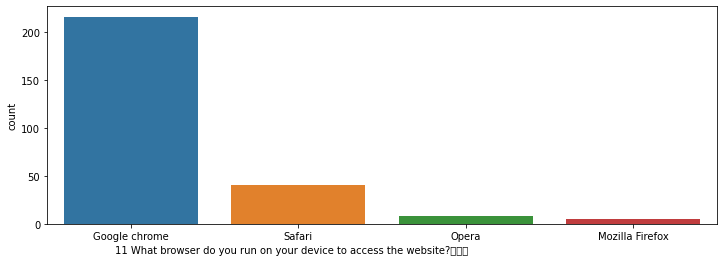

In [25]:
#most of customers use google chrome and a very few uses opera and mozila browser to shop online
plt.figure(figsize=(12,4))
sns.countplot(cust["11 What browser do you run on your device to access the website?\t\t\t                                                          "])

<AxesSubplot:xlabel='12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ', ylabel='count'>

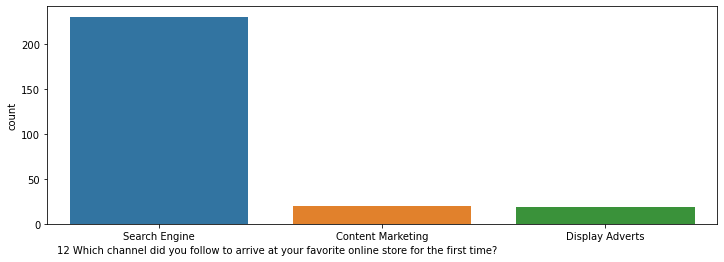

In [26]:
#most of the customers uses search engine to arrive online store and few are by content marketing and advts,
plt.figure(figsize=(12,4))
sns.countplot(cust['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '])

<AxesSubplot:xlabel='13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ', ylabel='count'>

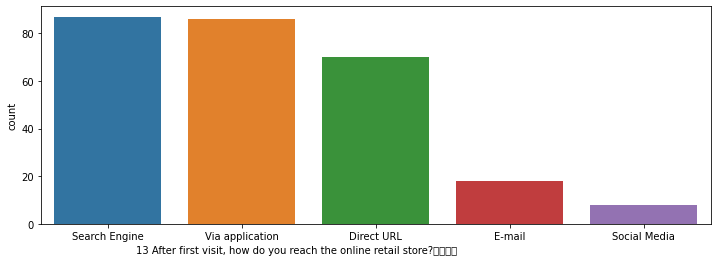

In [27]:
#mostly by search engine,via application and direct url few are by emails and social media 
plt.figure(figsize=(12,4))
sns.countplot(cust['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '])

<AxesSubplot:xlabel='14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ', ylabel='count'>

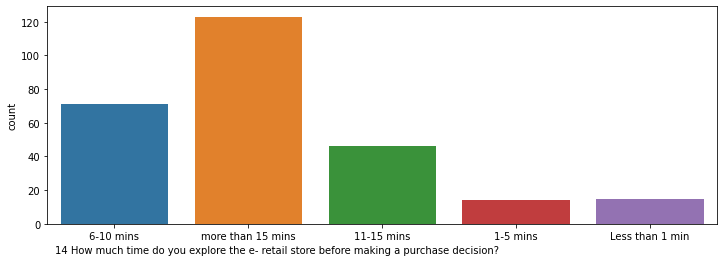

In [28]:
#mostly taking more than 15 minutes to make a  decision and few are making decision within a minute 
plt.figure(figsize=(12,4))
sns.countplot(cust["14 How much time do you explore the e- retail store before making a purchase decision?                                                                   "])

<AxesSubplot:xlabel='15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ', ylabel='count'>

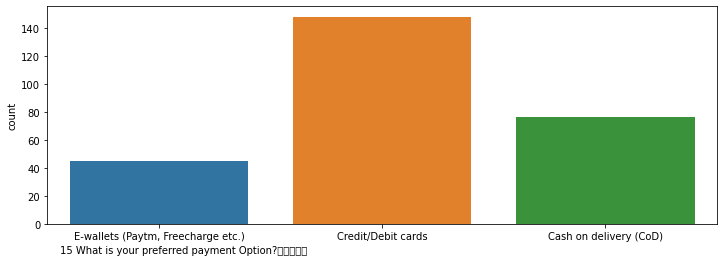

In [29]:
#mostly ueses cards for payment than cod and some are also using e-wallets
plt.figure(figsize=(12,4))
sns.countplot(cust["15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               "])

<AxesSubplot:xlabel='16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ', ylabel='count'>

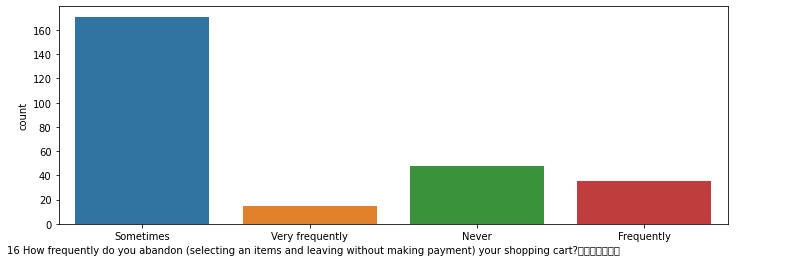

In [30]:
#mostly are sometimes frequent and some never check again and few are very frequent
plt.figure(figsize=(12,4))
sns.countplot(cust["16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   "])

<AxesSubplot:xlabel='17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ', ylabel='count'>

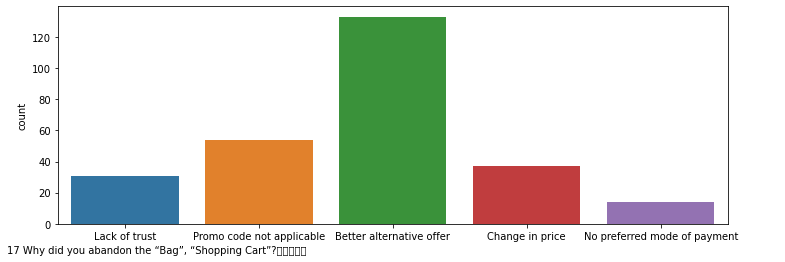

In [31]:
#most are aband by better deal they got,sone by not any offer , few by mode of payment
plt.figure(figsize=(12,4))
sns.countplot(cust["17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       "])

<AxesSubplot:xlabel='18 The content on the website must be easy to read and understand', ylabel='count'>

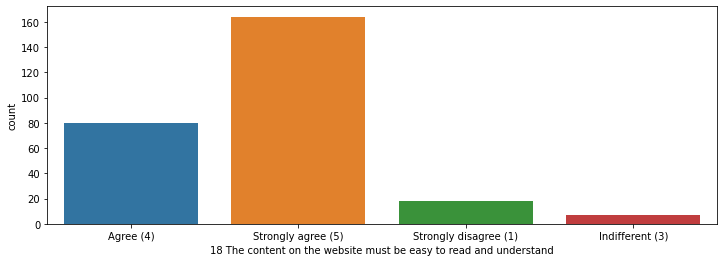

In [32]:
#mostly customers are strongly agree that website is easy to use
plt.figure(figsize=(12,4))
sns.countplot(cust["18 The content on the website must be easy to read and understand"])

<AxesSubplot:xlabel='19 Information on similar product to the one highlighted  is important for product comparison', ylabel='count'>

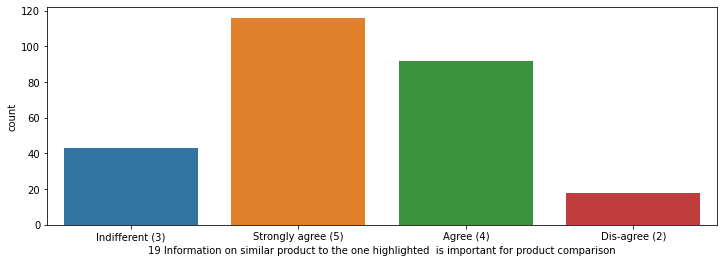

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(cust["19 Information on similar product to the one highlighted  is important for product comparison"])

<AxesSubplot:xlabel='20 Complete information on listed seller and product being offered is important for purchase decision.', ylabel='count'>

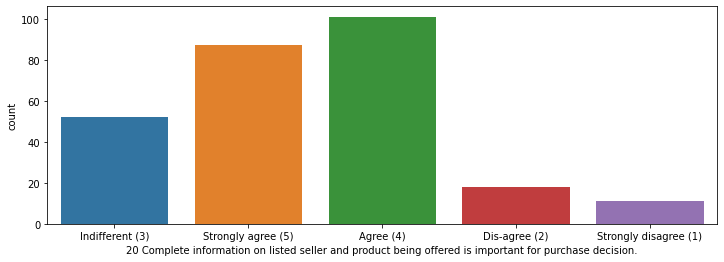

In [34]:
plt.figure(figsize=(12,4))
sns.countplot(cust["20 Complete information on listed seller and product being offered is important for purchase decision."])

<AxesSubplot:xlabel='21 All relevant information on listed products must be stated clearly', ylabel='count'>

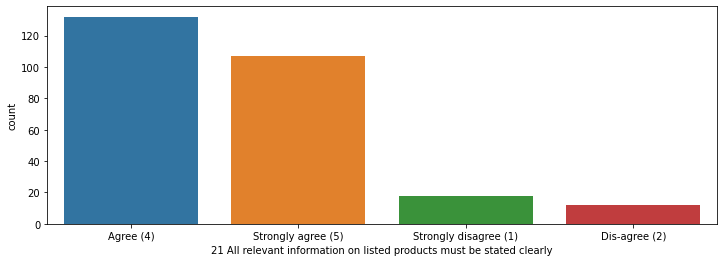

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(cust["21 All relevant information on listed products must be stated clearly"])

<AxesSubplot:xlabel='22 Ease of navigation in website', ylabel='count'>

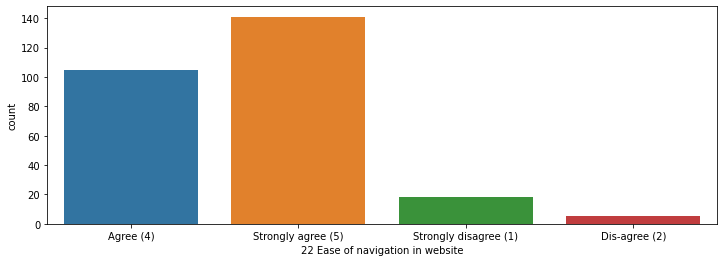

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(cust["22 Ease of navigation in website"])

<AxesSubplot:xlabel='23 Loading and processing speed', ylabel='count'>

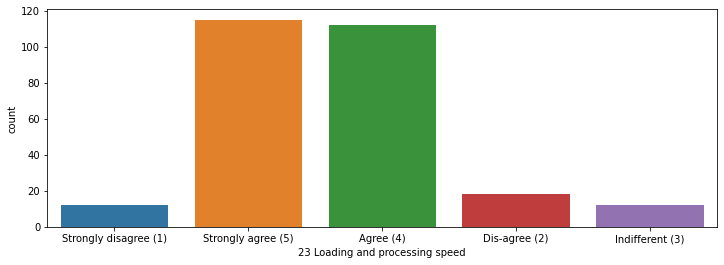

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(cust["23 Loading and processing speed"])

<AxesSubplot:xlabel='24 User friendly Interface of the website', ylabel='count'>

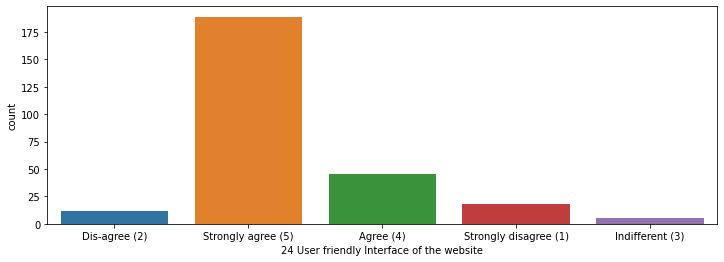

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(cust["24 User friendly Interface of the website"])

<AxesSubplot:xlabel='25 Convenient Payment methods', ylabel='count'>

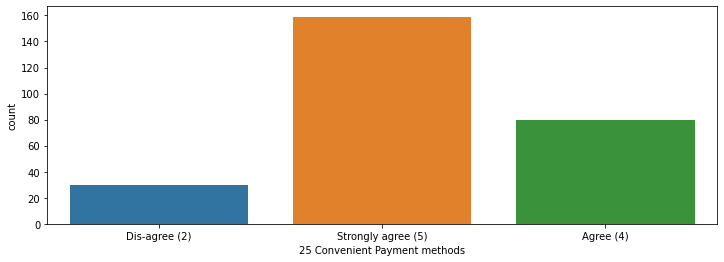

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(cust["25 Convenient Payment methods"])

<AxesSubplot:xlabel='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', ylabel='count'>

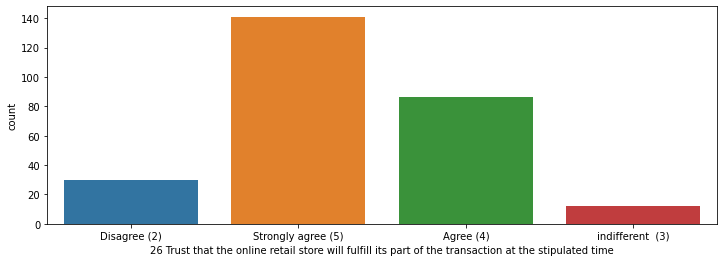

In [40]:
plt.figure(figsize=(12,4))
sns.countplot(cust["26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time"])

<AxesSubplot:xlabel='27 Empathy (readiness to assist with queries) towards the customers', ylabel='count'>

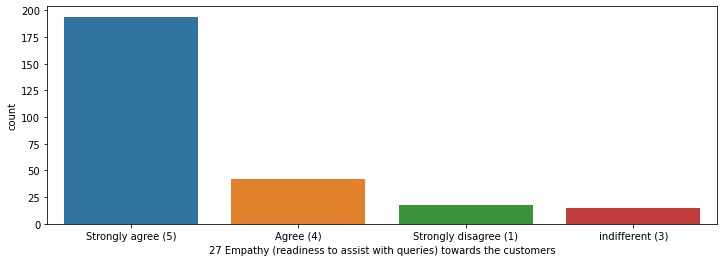

In [41]:
plt.figure(figsize=(12,4))
sns.countplot(cust["27 Empathy (readiness to assist with queries) towards the customers"])

<AxesSubplot:xlabel='28 Being able to guarantee the privacy of the customer', ylabel='count'>

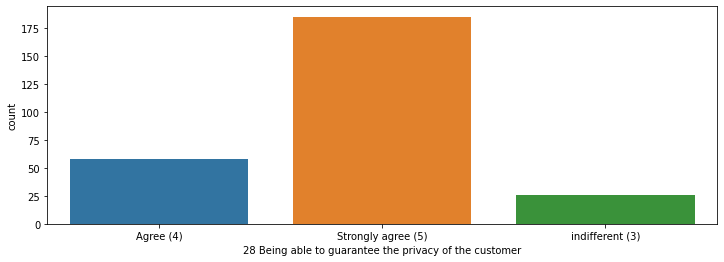

In [42]:
plt.figure(figsize=(12,4))
sns.countplot(cust["28 Being able to guarantee the privacy of the customer"])

<AxesSubplot:xlabel='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', ylabel='count'>

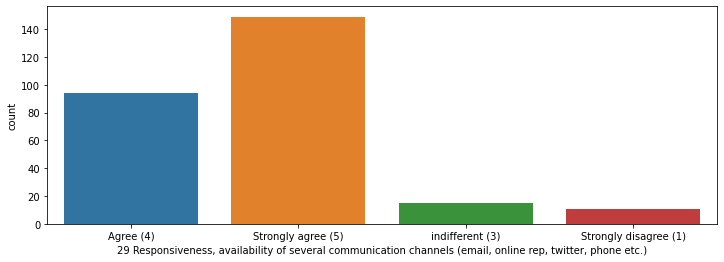

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(cust["29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)"])

<AxesSubplot:xlabel='30 Online shopping gives monetary benefit and discounts', ylabel='count'>

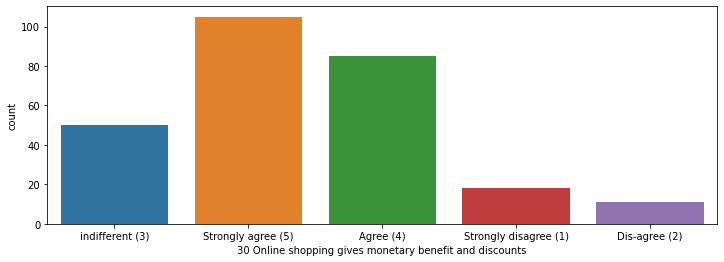

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(cust["30 Online shopping gives monetary benefit and discounts"])

<AxesSubplot:xlabel='31 Enjoyment is derived from shopping online', ylabel='count'>

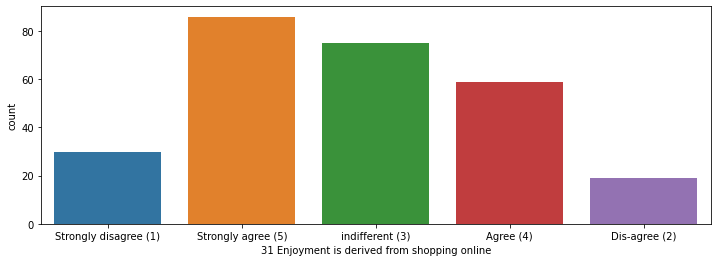

In [45]:
plt.figure(figsize=(12,4))
sns.countplot(cust["31 Enjoyment is derived from shopping online"])

<AxesSubplot:xlabel='32 Shopping online is convenient and flexible', ylabel='count'>

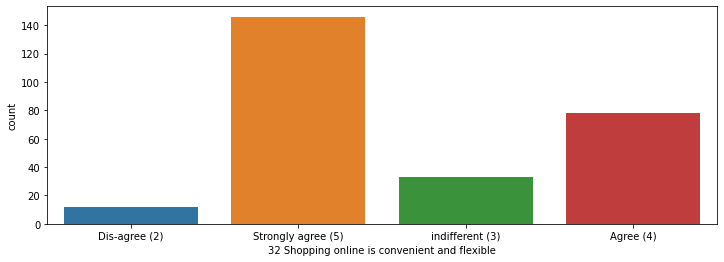

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(cust["32 Shopping online is convenient and flexible"])

<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision', ylabel='count'>

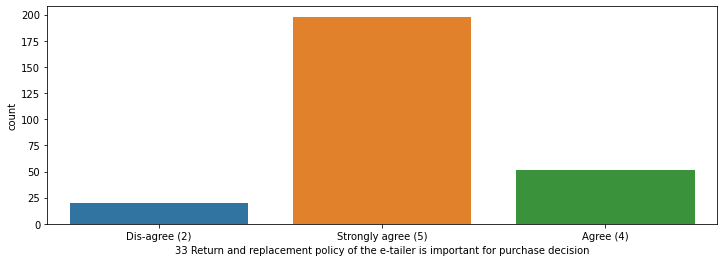

In [47]:
plt.figure(figsize=(12,4))
sns.countplot(cust["33 Return and replacement policy of the e-tailer is important for purchase decision"])

<AxesSubplot:xlabel='34 Gaining access to loyalty programs is a benefit of shopping online', ylabel='count'>

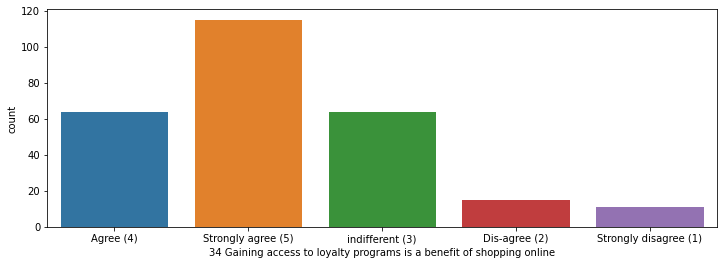

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(cust["34 Gaining access to loyalty programs is a benefit of shopping online"])

<AxesSubplot:xlabel='35 Displaying quality Information on the website improves satisfaction of customers', ylabel='count'>

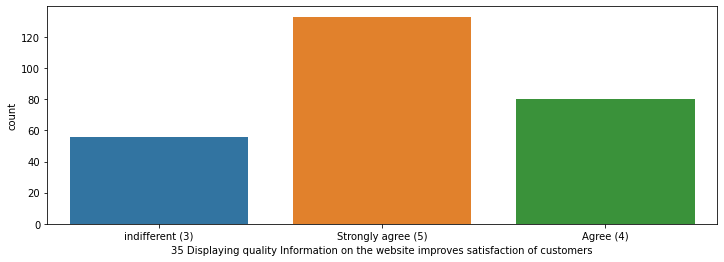

In [49]:
plt.figure(figsize=(12,4))
sns.countplot(cust["35 Displaying quality Information on the website improves satisfaction of customers"])

<AxesSubplot:xlabel='36 User derive satisfaction while shopping on a good quality website or application', ylabel='count'>

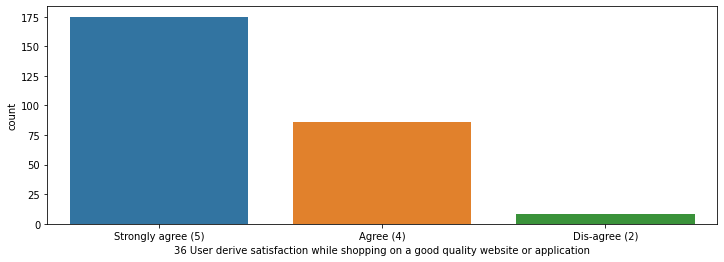

In [50]:
plt.figure(figsize=(12,4))
sns.countplot(cust["36 User derive satisfaction while shopping on a good quality website or application"])

<AxesSubplot:xlabel='37 Net Benefit derived from shopping online can lead to users satisfaction', ylabel='count'>

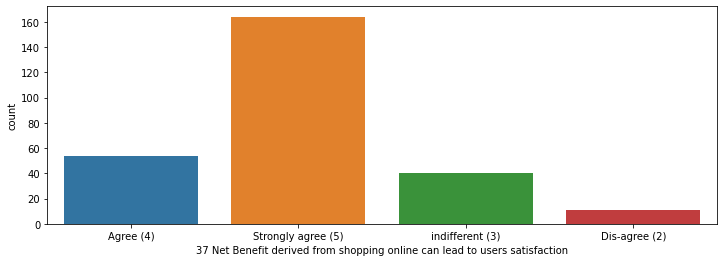

In [51]:
plt.figure(figsize=(12,4))
sns.countplot(cust["37 Net Benefit derived from shopping online can lead to users satisfaction"])

<AxesSubplot:xlabel='38 User satisfaction cannot exist without trust', ylabel='count'>

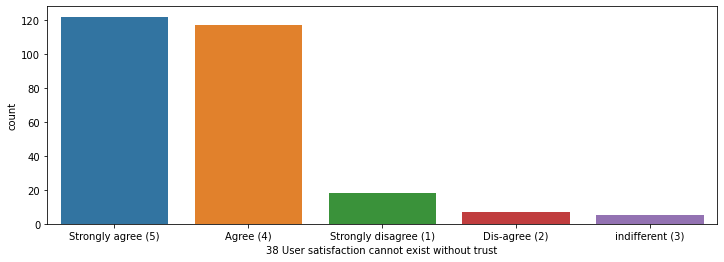

In [52]:
plt.figure(figsize=(12,4))
sns.countplot(cust["38 User satisfaction cannot exist without trust"])

<AxesSubplot:xlabel='39 Offering a wide variety of listed product in several category', ylabel='count'>

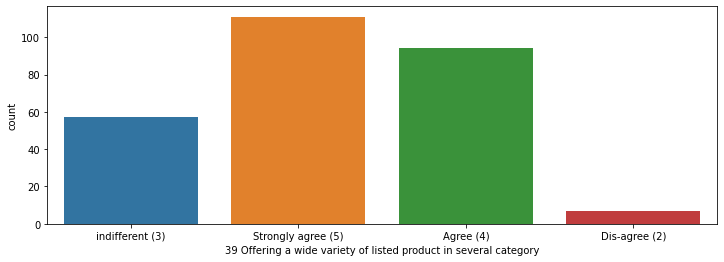

In [53]:
plt.figure(figsize=(12,4))
sns.countplot(cust["39 Offering a wide variety of listed product in several category"])

<AxesSubplot:xlabel='40 Provision of complete and relevant product information', ylabel='count'>

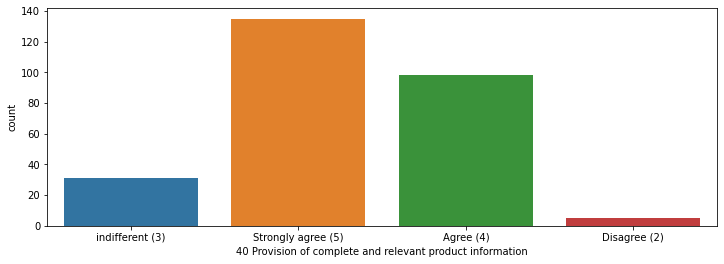

In [54]:
plt.figure(figsize=(12,4))
sns.countplot(cust["40 Provision of complete and relevant product information"])

<AxesSubplot:xlabel='41 Monetary savings', ylabel='count'>

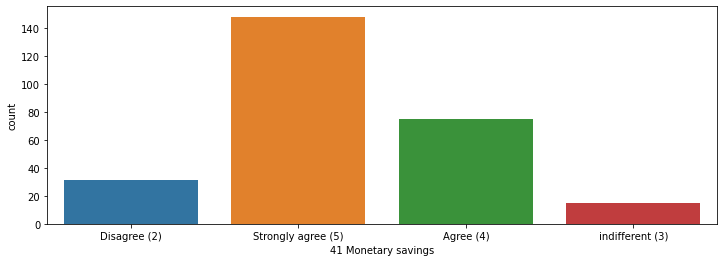

In [55]:
plt.figure(figsize=(12,4))
sns.countplot(cust["41 Monetary savings"])

<AxesSubplot:xlabel='42 The Convenience of patronizing the online retailer', ylabel='count'>

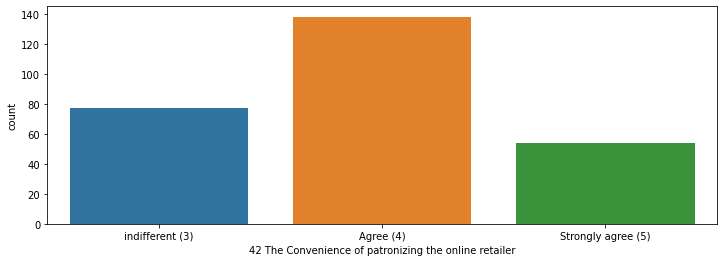

In [56]:
plt.figure(figsize=(12,4))
sns.countplot(cust["42 The Convenience of patronizing the online retailer"])

<AxesSubplot:xlabel='43 Shopping on the website gives you the sense of adventure', ylabel='count'>

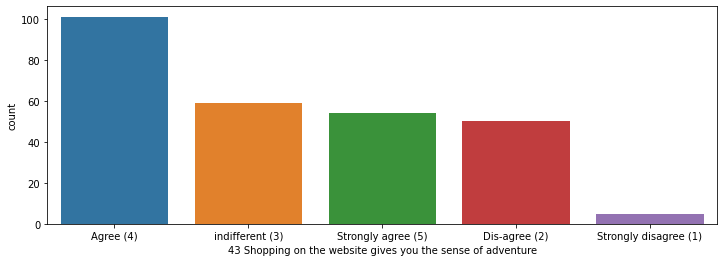

In [57]:
plt.figure(figsize=(12,4))
sns.countplot(cust["43 Shopping on the website gives you the sense of adventure"])

<AxesSubplot:xlabel='44 Shopping on your preferred e-tailer enhances your social status', ylabel='count'>

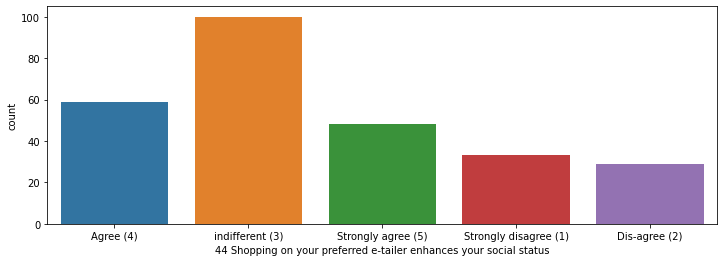

In [58]:
plt.figure(figsize=(12,4))
sns.countplot(cust["44 Shopping on your preferred e-tailer enhances your social status"])

<AxesSubplot:xlabel='45 You feel gratification shopping on your favorite e-tailer', ylabel='count'>

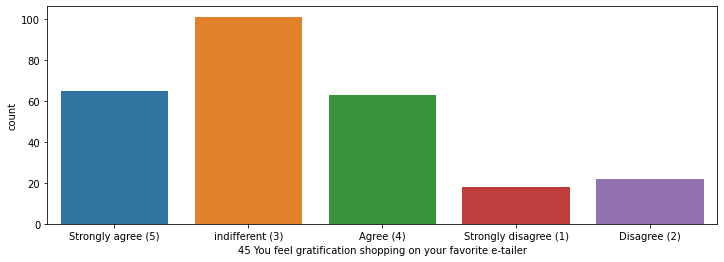

In [59]:
plt.figure(figsize=(12,4))
sns.countplot(cust["45 You feel gratification shopping on your favorite e-tailer"])

<AxesSubplot:xlabel='46 Shopping on the website helps you fulfill certain roles', ylabel='count'>

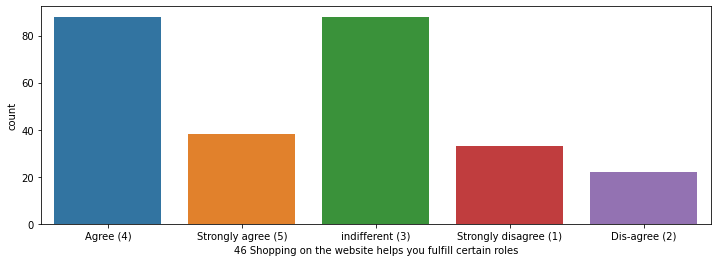

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(cust["46 Shopping on the website helps you fulfill certain roles"])

<AxesSubplot:xlabel='47 Getting value for money spent', ylabel='count'>

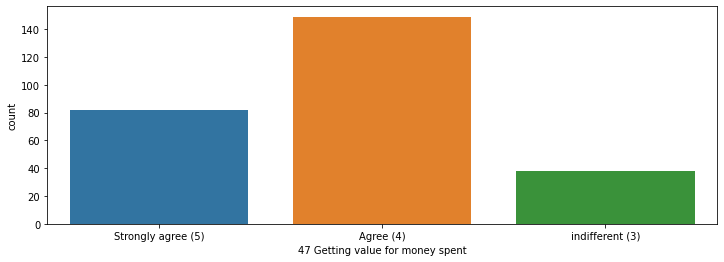

In [61]:
plt.figure(figsize=(12,4))
sns.countplot(cust["47 Getting value for money spent"])

<AxesSubplot:xlabel='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', ylabel='count'>

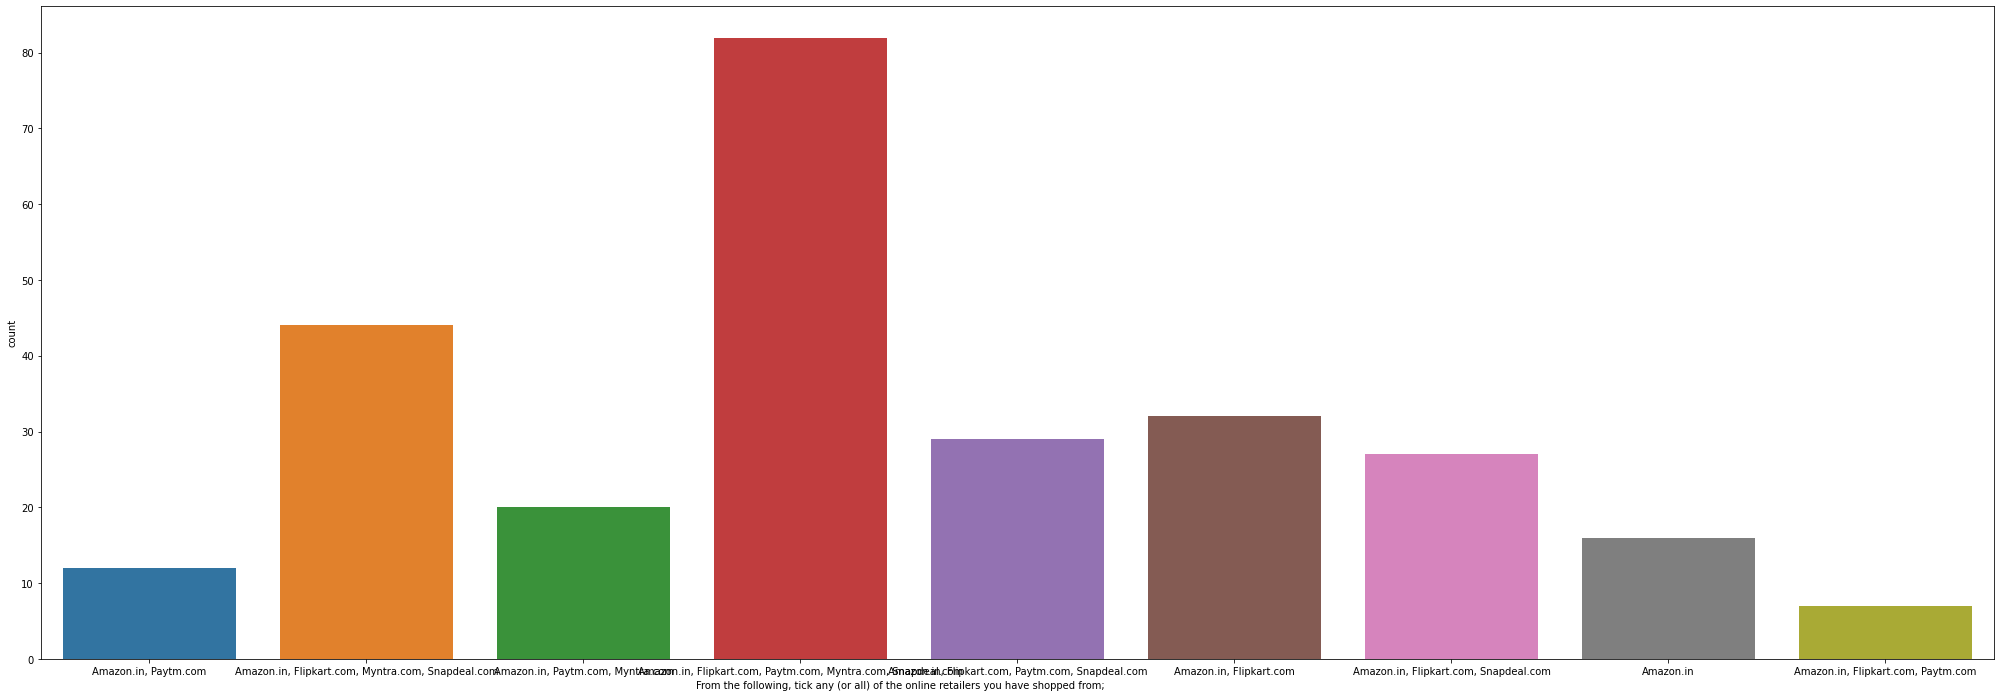

In [62]:
plt.figure(figsize=(35,12))
sns.countplot(cust["From the following, tick any (or all) of the online retailers you have shopped from;                                                                           "])

<AxesSubplot:xlabel='Easy to use website or application', ylabel='count'>

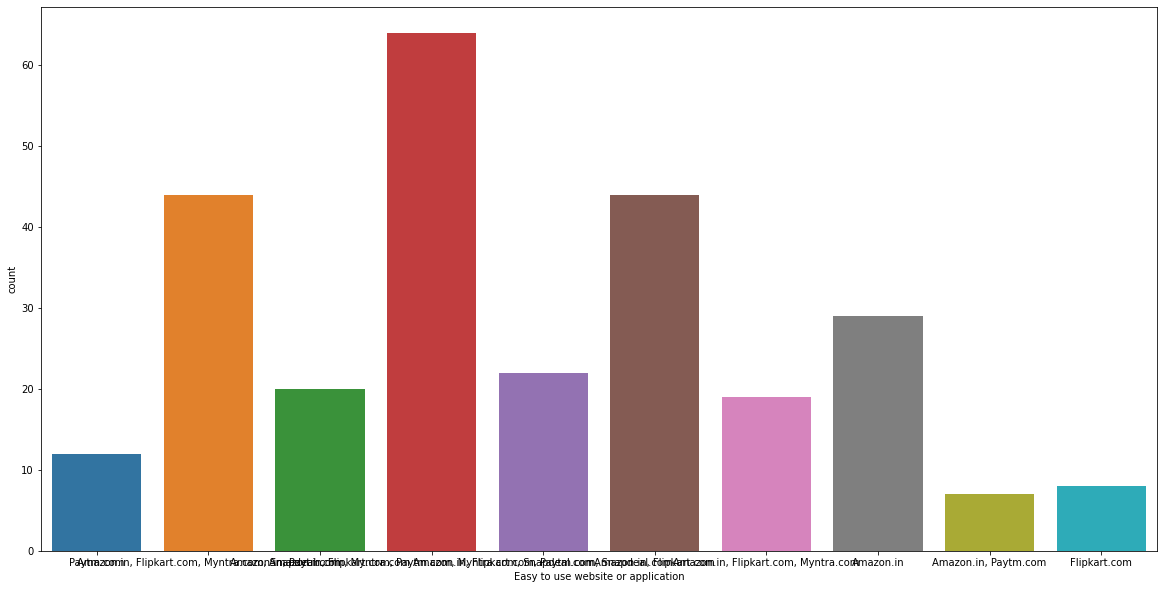

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(cust["Easy to use website or application"])

<AxesSubplot:xlabel='Website is as efficient as before', ylabel='count'>

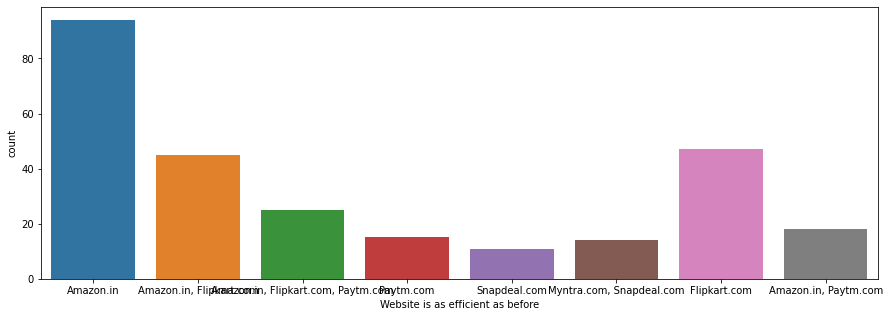

In [64]:
#amazon is most efficient as before than flipcart
plt.figure(figsize=(15,5))
sns.countplot(cust["Website is as efficient as before"])

<AxesSubplot:xlabel='Perceived Trustworthiness', ylabel='count'>

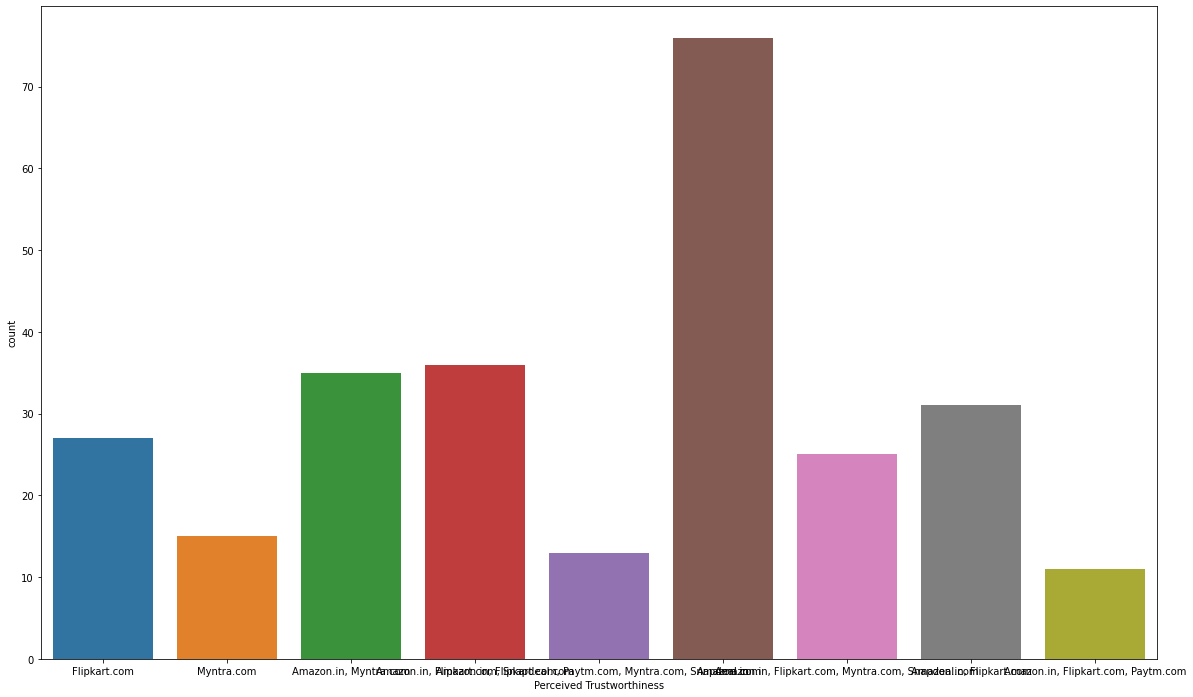

In [65]:
plt.figure(figsize=(20,12))
sns.countplot(cust["Perceived Trustworthiness"])

<AxesSubplot:xlabel='Longer delivery period', ylabel='count'>

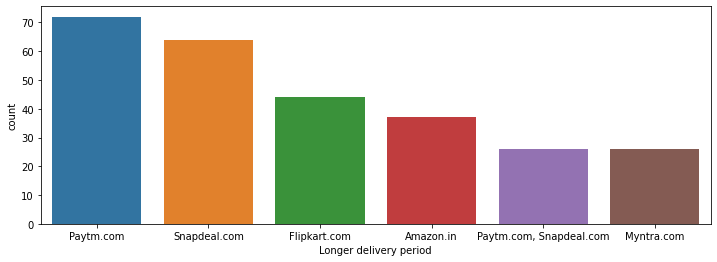

In [66]:
#paytm took longer time period to deliver and myntra took vry few time period for delivery
plt.figure(figsize=(12,4))
sns.countplot(cust["Longer delivery period"])

<AxesSubplot:xlabel='Speedy order delivery ', ylabel='count'>

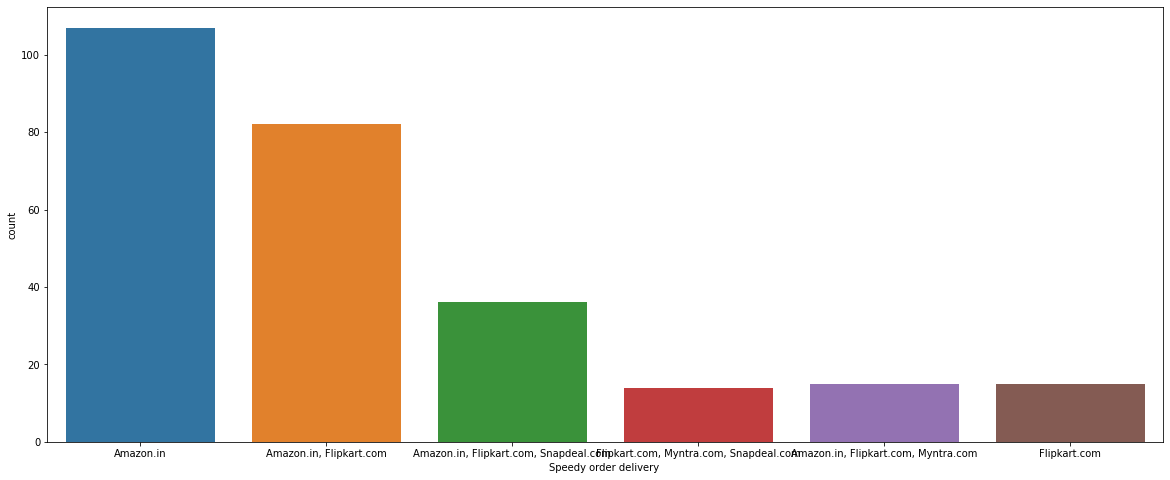

In [67]:
#amazon gives fastest delvery  and flipcart  slowest
plt.figure(figsize=(20,8))
sns.countplot(cust["Speedy order delivery "])

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

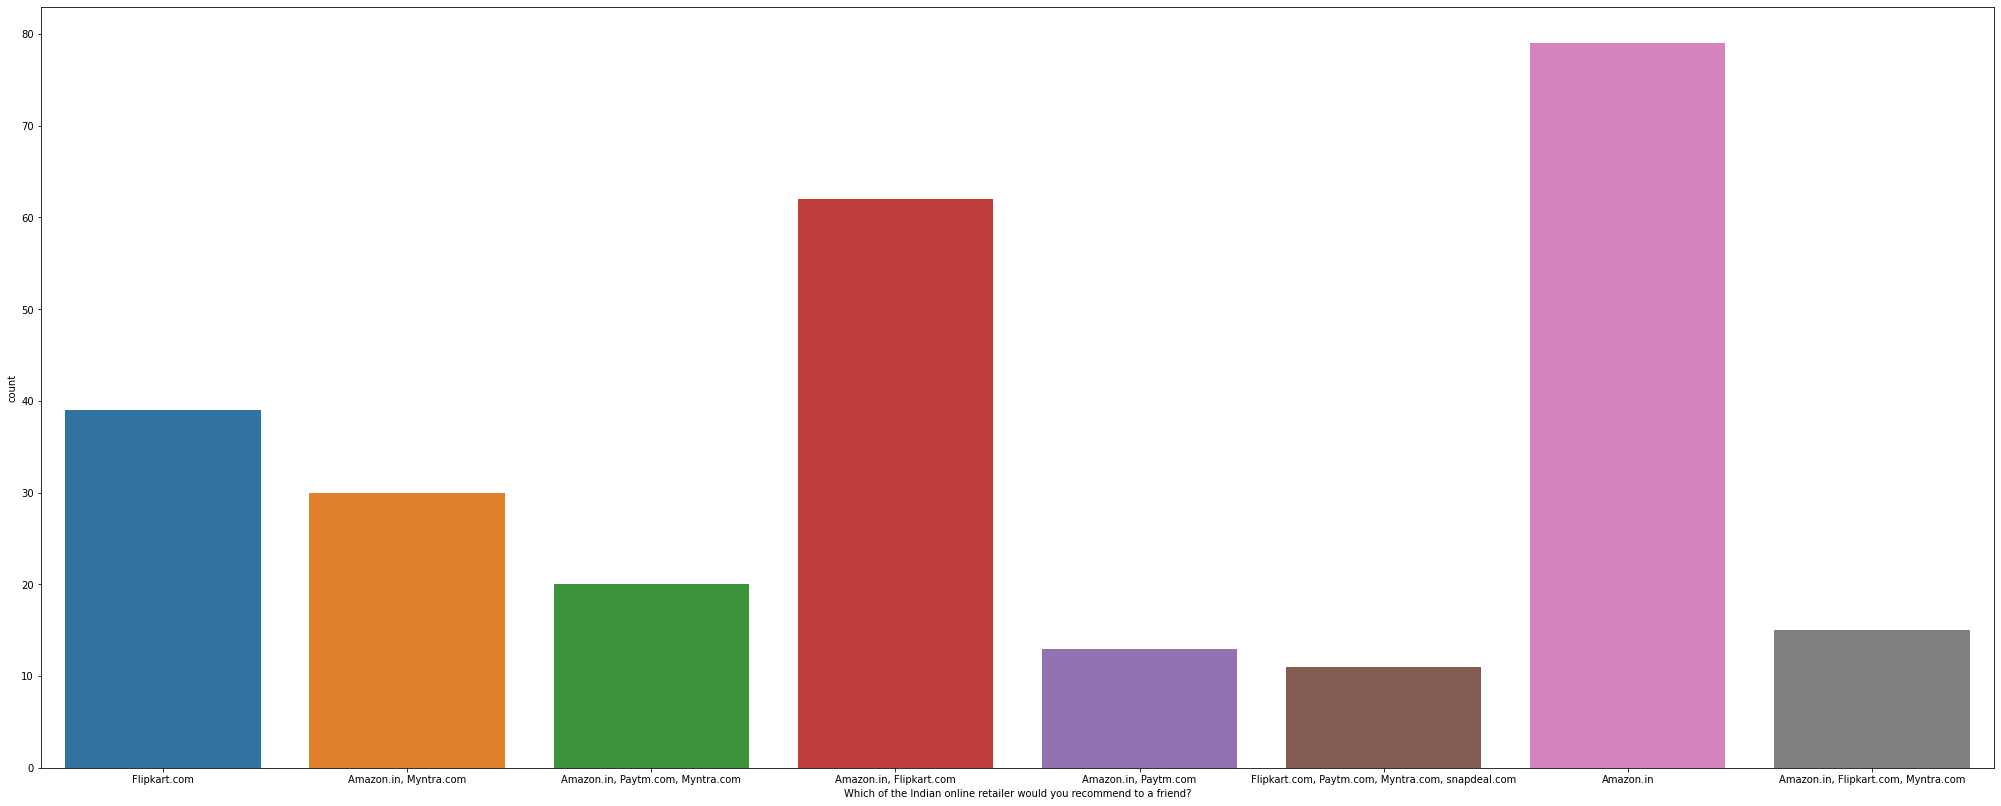

In [68]:
#most wll reccomand amazon to friend
plt.figure(figsize=(35,14))
sns.countplot(cust["Which of the Indian online retailer would you recommend to a friend?"])

# EDA

In [69]:
cust.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

In [72]:
cust["4 What is the Pin Code of where you shop online from?"]=cust["4 What is the Pin Code of where you shop online from?"].astype(object)

In [73]:
cust.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  object
5 Since How Long You are Shopping Online ?                                                                      

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='count'>

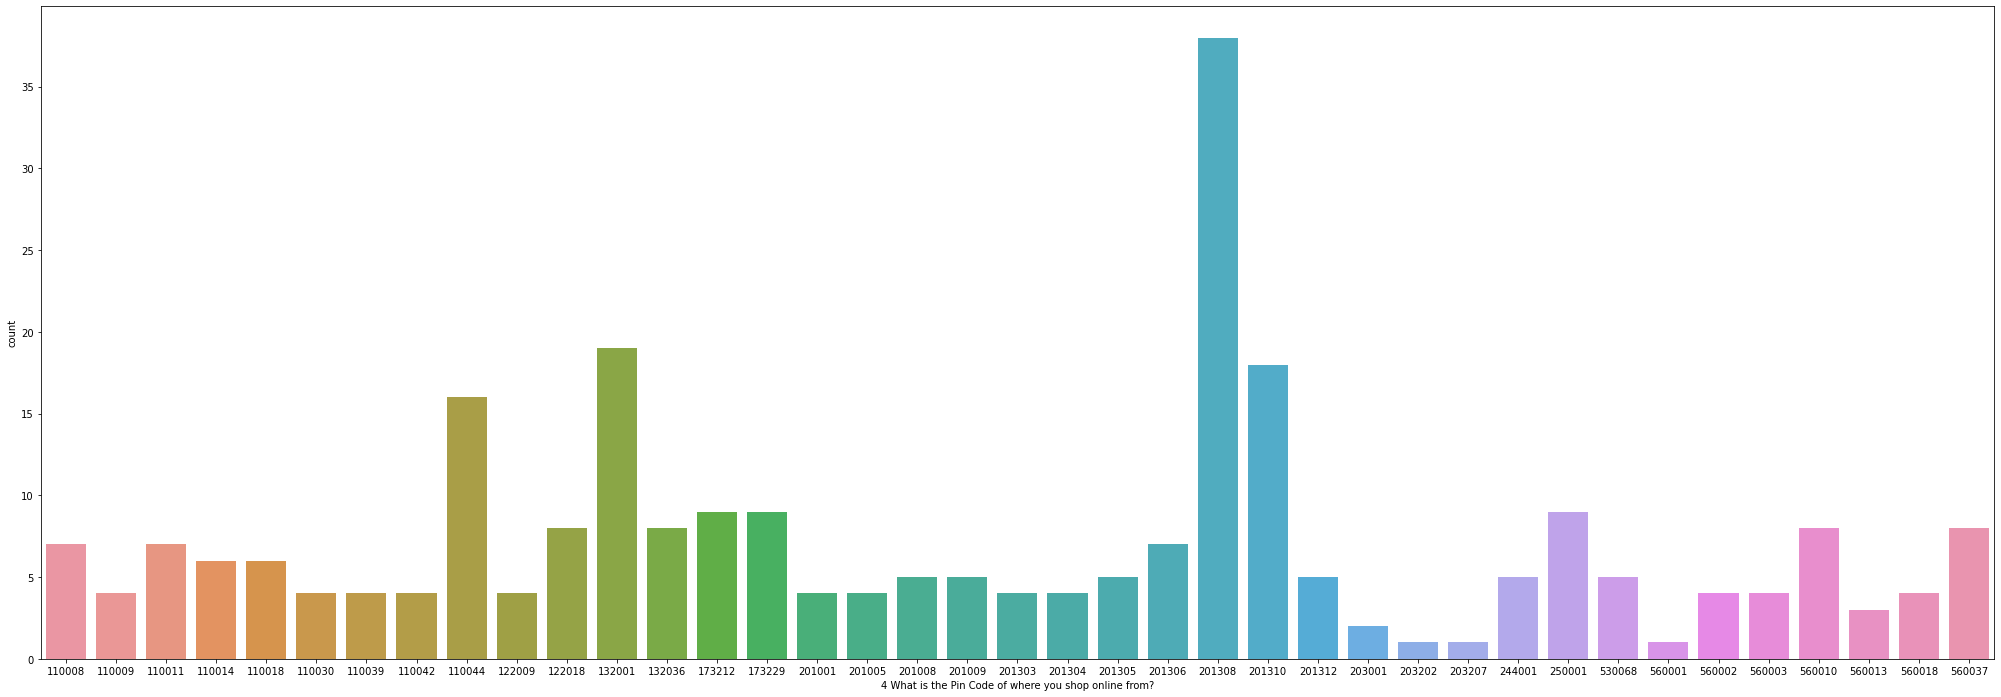

In [74]:
plt.figure(figsize=(35,12))
sns.countplot(cust["4 What is the Pin Code of where you shop online from?"])


In [75]:
cust["4 What is the Pin Code of where you shop online from?"].value_counts()


201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304     4
110009     4
201303     4
560002     4
560018     4
110042     4
110030     4
201005     4
110039     4
560013     3
203001     2
203202     1
560001     1
203207     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le=LabelEncoder()

In [78]:
for i in cust.columns:
    if cust[i].dtypes=="object":
        cust[i]=le.fit_transform(cust[i].values.reshape(-1,1))
        

In [79]:
cust

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
4                        0                    0   
5                        0                    1   
6                        1                    2   
7                        1                    2   
8                        0                    4   
9                        0                    1   
10                       1                    1   
11                       0                    2   
12                       0                    3   
13                       0                    1   
14                       0                    0   
15                       0                    0   
16                       1                    1   
17                       1                    2   
18                       0                    2   
19                       0                    0   
20                       0                    0   
21                       1                    1   
22                       1                    2   
23                       0                    2   
24                       0                    0   
25                       0                    0   
26                       1                    0   
27                       1                    1   
28                       0                    2   
29                       0                    2   
30                       0                    4   
31                       1                    1   
32                       1                    1   
33                       0                    2   
34                       0                    3   
35                       0                    0   
36                       1                    1   
37                       1                    2   
38                       0                    2   
39                       0                    0   
40                       0                    0   
41                       1                    1   
42                       1                    0   
43                       0                    0   
44                       0                    1   
45                       0                    2   
46                       1                    2   
47                       1                    4   
48                       0                    1   
49                       0                    1   
50                       0                    2   
51                       1                    3   
52                       1                    2   
53                       0                    2   
54                       0                    0   
55                       0                    0   
56                       1                    0   
57                       1                    0   
58                       0                    1   
59                       0                    2   
60                       0                    2   
61                       1                    4   
62                       1                    1   
63                       0                    1   
64                       0                    2   
65                       0                    3   
66                       1                    1   
67                       1                    2   
68                       0                    2   
69                       0                    0   
70                       0                    0   
71                       1                    1   
72                       1                    0   
73                       0                    0   
74                       0                    1   
75                       0                    2   
76                       1                    2   
77                       1 